# DPD: 911 Calls for Service

# Introduction

This data represents all the 911 police emergency calls for service response and officer-initiated call for service in the City of Detroit from the beginning September 20, 2016 - present. People call 911 to request police services during emergency. Calls for which officer was initiated include traffic stops, street investigations and other policing activities like observing crimes in progress where the police officers were initiated. This data includes the responding agency, unit, call type and category of each call. The table includes all the calls taken, dispatch time, travel time and total response time for all the calls serviced by a police agency.

# Importing

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [65]:
import os

In [66]:
import os
path="/Users/Anirudh MVR"
os.chdir(path)

In [67]:
os.getcwd()

'C:\\Users\\Anirudh MVR'

In [68]:
df = pd.read_csv('data.csv', low_memory=False)

# Data Wrangling

In [82]:
df.head()

,Incident ID,Agency,Incident Address,Zip Code,Priority,Call Code,Call Description,Category,Call Time,Time of Call,...,Travel Time,Total Response Time,Time On Scene,Total Time,Neighborhood,Census Block GEOID,Council District,Longitude,Latitude,Incident Location
0,201801600016,DPD,2400 block of S BASSETT ST,48217,1.0,343010,FELONIOUS ASSAULT IP,FA IP,01/16/2018 12:06:06 AM,12:06:06 AM,...,NaN,NaN,NaN,NaN,Boynton,2.616352e+14,6.0,-83.150709,42.268094,"location\n(42.2680942952788, -83.150708724902)"
1,201801600348,DPD,5100 block of CASS AVE,48201,3.0,W4812,BUILDING CHECK,BLDGCHK,01/16/2018 03:01:19 AM,3:01:19 AM,...,0,0,79.2,79.2,Wayne State,2.616352e+14,6.0,-83.066717,42.355942,"location\n(42.355941500239, -83.0667170676879)"
2,201801200482,DPD,16400 block of E WARREN AVE,48224,3.0,SA,SPECIAL ATTENTION,SPCL ATT,01/12/2018 03:58:49 AM,3:58:49 AM,...,0,0,11.1,11.1,Morningside,2.616350e+14,4.0,-82.937162,42.403382,"location\n(42.4033824178846, -82.9371618461517)"
3,201733002964,DPD,22300 block of GRAND RIVER AVE,48219,1.0,343010,FELONIOUS ASSAULT IP,FA IP,11/26/2017 07:58:57 PM,7:58:57 PM,...,3,7.1,148.1,155.2,Old Redford,2.616354e+14,1.0,-83.261757,42.418236,"location\n(42.4182358051442, -83.2617570584306)"
4,201732501446,DPD,19300 block of GRAND RIVER AVE,48223,3.0,361030,LARCENY I/P OR J/H,LARCENY,11/21/2017 01:10:30 PM,1:10:30 PM,...,NaN,NaN,NaN,NaN,Rosedale Park,2.616354e+14,1.0,-83.231836,42.406086,"location\n(42.4060859317248, -83.2318357622364)"


Step 1: Checking null-values

In [83]:
print(df.columns[df.isnull().any()].tolist())

['Priority', 'Responding Unit', 'Intake Time', 'Dispatch Time', 'Travel Time', 'Total Response Time', 'Time On Scene', 'Total Time', 'Neighborhood', 'Census Block GEOID', 'Council District', 'Longitude', 'Latitude', 'Incident Location']


Step 2: Removing unnecessary columns

In [84]:
df.drop(df.columns[[0,1]], axis=1, inplace=True)

Step 3: Removal of null-values

In [69]:
df_new = df.dropna()

In [70]:
df_new.head()

,Incident ID,Agency,Incident Address,Zip Code,Priority,Call Code,Call Description,Category,Call Time,Time of Call,...,Travel Time,Total Response Time,Time On Scene,Total Time,Neighborhood,Census Block GEOID,Council District,Longitude,Latitude,Incident Location
3,201733002964,DPD,22300 block of GRAND RIVER AVE,48219,1.0,343010,FELONIOUS ASSAULT IP,FA IP,11/26/2017 07:58:57 PM,7:58:57 PM,...,3,7.1,148.1,155.2,Old Redford,2.616354e+14,1.0,-83.261757,42.418236,"location\n(42.4182358051442, -83.2617570584306)"
5,201732700280,DPD,21700 block of SCHOOLCRAFT ST,48223,3.0,SA,SPECIAL ATTENTION,SPCL ATT,11/23/2017 01:38:50 AM,1:38:50 AM,...,0,0,18.4,18.4,Brightmoor,2.616354e+14,1.0,-83.255588,42.385950,"location\n(42.3859496020119, -83.2555877567355)"
7,201732503353,DPD,Corner of JOY RD and PATTON ST,48228,2.0,TS,TRAFFIC STOP,TRF STOP,11/21/2017 10:51:43 PM,10:51:43 PM,...,0,0,15.4,15.4,Warrendale,2.616355e+14,7.0,-83.242107,42.357486,"location\n(42.3574864009718, -83.2421065494255)"
9,201803900252,DPD,Corner of E WARREN AVE and CONNER ST,48214,3.0,W8190,TOWING DETAIL,TOW,02/08/2018 02:31:00 AM,2:31:00 AM,...,0,0,0.3,0.3,Conner Creek Industrial,2.616399e+14,4.0,-82.975907,42.389305,"location\n(42.3893050750403, -82.9759073917964)"
10,201803900198,DPD,1600 block of E STATE FAIR ST,48203,3.0,825030,DISTURBANCE,DISTURB,02/08/2018 01:57:34 AM,1:57:34 AM,...,22,28.3,5.5,33.7,Nolan,2.616351e+14,3.0,-83.087857,42.440017,"location\n(42.4400172286691, -83.087857179485)"


In [77]:
df_new.tail()

,Incident ID,Agency,Incident Address,Zip Code,Priority,Call Code,Call Description,Category,Call Time,Time of Call,...,Travel Time,Total Response Time,Time On Scene,Total Time,Neighborhood,Census Block GEOID,Council District,Longitude,Latitude,Incident Location
1173527,201722702315,DPD,4500 block of WOODWARD AVE,48201,3.0,SA,SPECIAL ATTENTION,SPCL ATT,08/15/2017 04:19:55 PM,4:19:55 PM,...,0,0,6.5,6.5,Midtown,2.616352e+14,6.0,-83.062100,42.353558,"location\n(42.3535581849384, -83.0620998777846)"
1173528,201722701121,DPD,4500 block of WOODWARD AVE,48201,3.0,W9999,INFORMATION/NON-CRIMINAL RPT,INFORPT,08/15/2017 10:18:27 AM,10:18:27 AM,...,0,0,0.1,0.2,Midtown,2.616352e+14,6.0,-83.062100,42.353558,"location\n(42.3535581849384, -83.0620998777846)"
1173529,201722703859,DPD,100 block of PETERBORO ST,48201,3.0,843030,INVESTIGATE PERSON,INVPERS,08/15/2017 11:26:58 PM,11:26:58 PM,...,10.2,17.6,11.7,29.4,Midtown,2.616352e+14,6.0,-83.057557,42.344970,"location\n(42.3449695993451, -83.057557498342)"
1173536,201732500858,DPD,2900 block of KENDALL ST,48238,1.0,396010,CHILD / ADULT ABUSE,ABUSE,11/21/2017 09:27:54 AM,9:27:54 AM,...,0,0,4.4,4.4,Oakman Blvd Community,2.616353e+14,2.0,-83.128477,42.396596,"location\n(42.3965964398923, -83.1284770756502)"
1173537,201732500785,DPD,600 block of SEWARD ST,48202,2.0,312020,SUICIDE THREAT,SUICTHRT,11/21/2017 08:56:16 AM,8:56:16 AM,...,7.4,12.5,26.9,39.4,New Center Commons,2.616353e+14,5.0,-83.080629,42.373530,"location\n(42.3735303316245, -83.0806291376661)"


# Data Description

In [78]:
df_new.describe()

,Incident ID,Priority,Census Block GEOID,Council District,Longitude,Latitude
count,4.415760e+05,441576.000000,4.415760e+05,441576.000000,441576.000000,441576.000000
mean,2.017493e+11,2.560676,2.616351e+14,4.340782,-83.099933,42.382769
std,5.741148e+07,0.791402,1.032734e+10,1.929937,0.090638,0.038138
min,2.016264e+11,1.000000,2.609926e+14,1.000000,-83.287780,42.255712
25%,2.017123e+11,2.000000,2.616351e+14,3.000000,-83.179104,42.353671
50%,2.017305e+11,3.000000,2.616352e+14,5.000000,-83.083258,42.380185
75%,2.018101e+11,3.000000,2.616354e+14,6.000000,-83.033062,42.417137
max,2.018190e+11,7.000000,2.616399e+14,7.000000,-82.910559,42.450304


In [73]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441576 entries, 3 to 1173537
Data columns (total 25 columns):
Incident ID                441576 non-null int64
Agency                     441576 non-null object
Incident Address           441576 non-null object
Zip Code                   441576 non-null object
Priority                   441576 non-null float64
Call Code                  441576 non-null object
Call Description           441576 non-null object
Category                   441576 non-null object
Call Time                  441576 non-null object
Time of Call               441576 non-null object
Precinct/Scout Car Area    441576 non-null object
Responding Unit            441576 non-null object
Officer Initiated          441576 non-null object
Intake Time                441576 non-null object
Dispatch Time              441576 non-null object
Travel Time                441576 non-null object
Total Response Time        441576 non-null object
Time On Scene              441576 non-

In [79]:
df_new.shape

(441576, 25)

In [80]:
df_new.columns

Index(['Incident ID', 'Agency', 'Incident Address', 'Zip Code', 'Priority',
       'Call Code', 'Call Description', 'Category', 'Call Time',
       'Time of Call', 'Precinct/Scout Car Area', 'Responding Unit',
       'Officer Initiated', 'Intake Time', 'Dispatch Time', 'Travel Time',
       'Total Response Time', 'Time On Scene', 'Total Time', 'Neighborhood',
       'Census Block GEOID', 'Council District', 'Longitude', 'Latitude',
       'Incident Location'],
      dtype='object')

In [76]:
df_new.ndim

2

# Exploratory Data Analysis

In [203]:
call_description = df_new['Call Description'].value_counts()

In [204]:
call_description

TRAFFIC STOP                      121187
SPECIAL ATTENTION                  50073
TOWING DETAIL                      26501
DISTURBANCE                        22246
ASSAULT AND BATTERY                14480
UNKNOWN PROBLEM                    13858
INVESTIGATE PERSON                 13171
LARCENY REPORT                     12458
REMARKS                            11919
START OF SHIFT INFORMATION         11059
UDAA REPORT                         9881
FELONIOUS ASSAULT IP                6320
AUTO X UNK INJ / IMPAIRED           6239
THREATS REPORT                      5512
FRAUD REPORT                        5389
INVESTIGATE AUTO                    5050
ONE DOWN OR OVER THE WHEEL          4544
MALICIOUS DESTRUCTION RPT           4346
RECOVER AUTO                        4068
PERSON WITH WEAPON                  3943
VERIFIED ALR / PERSON W/O CODE      3870
AUTO X OR PED X - INJURIES          3595
INFORMATION/NON-CRIMINAL RPT        3349
BURGLARY OCCUPIED RESD I/P          2878
PANIC / DURESS A

In [87]:
vals = df_new['Neighborhood'].value_counts()

In [88]:
top_ten_neighborhood = vals[0:9]

In [89]:
top_ten_neighborhood

Midtown                 13927
Warrendale              13492
Downtown                13232
Franklin Park           10811
Airport Sub              6989
Claytown                 6373
Nolan                    6363
Eastern Market           5356
Warren Ave Community     5242
Name: Neighborhood, dtype: int64

# Top 10 Neighborhood

Text(0.5,1,'Top 10 Neighborhood')

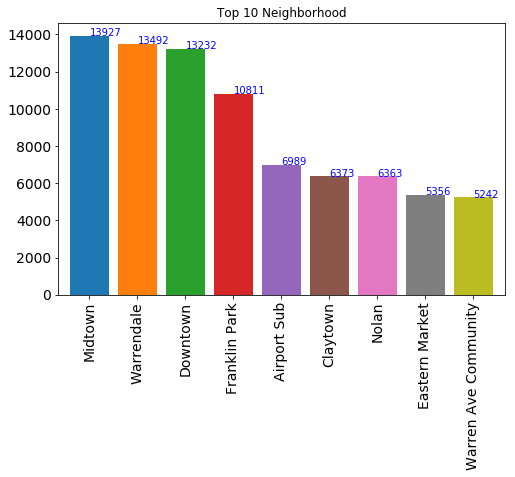

In [123]:
plt.figure(figsize=(8, 5),)
ax = top_ten_neighborhood.plot.bar(width = 0.8)
for i, v in top_ten_neighborhood.reset_index().iterrows():
    ax.text(i, v.Neighborhood + 0.2, v.Neighborhood, color = 'blue')
plt.title('Top 10 Neighborhood')

In [119]:
vals_1 = df_new['Call Description'].value_counts()

In [120]:
top_ten_calls = vals_1[0:9]

In [121]:
top_ten_calls

TRAFFIC STOP           121187
SPECIAL ATTENTION       50073
TOWING DETAIL           26501
DISTURBANCE             22246
ASSAULT AND BATTERY     14480
UNKNOWN PROBLEM         13858
INVESTIGATE PERSON      13171
LARCENY REPORT          12458
REMARKS                 11919
Name: Call Description, dtype: int64

# Top 10 Call Descriptions

Text(0.5,1,'Top 10 Call Descriptions')

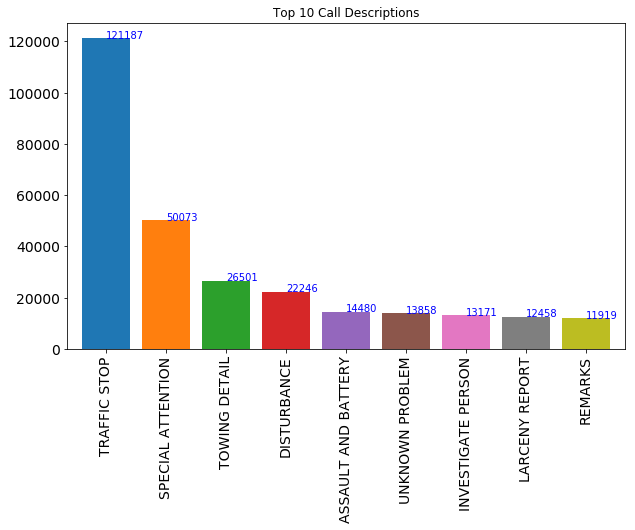

In [122]:
plt.figure(figsize=(10, 6),)
ax = top_ten_calls.plot.bar(width = 0.8)
for i, v in top_ten_calls.reset_index().iterrows():
    ax.text(i, v['Call Description'] + 0.2, v['Call Description'], color = 'blue')
plt.title('Top 10 Call Descriptions')

# Officers Inititation

In [95]:
vals_2 = df_new['Officer Initiated'].value_counts()

In [96]:
vals_2

Yes    301088
No     140488
Name: Officer Initiated, dtype: int64

Text(0.5,1,'Officers Inititation')

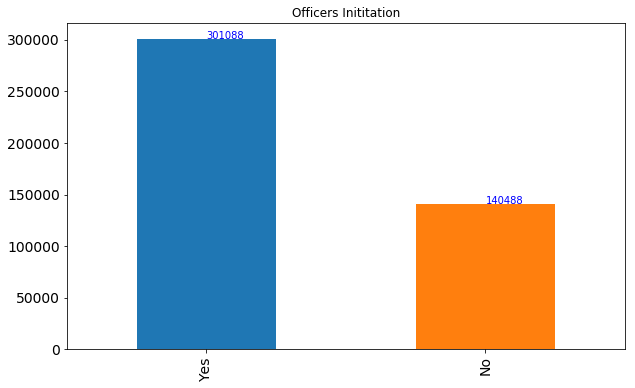

In [117]:
plt.figure(figsize=(10, 6),)
ax = vals_2.plot.bar(width = 0.5)
for i, v in vals_2.reset_index().iterrows():
    ax.text(i, v['Officer Initiated'] + 0.2, v['Officer Initiated'], color = 'blue')
plt.title('Officers Inititation')

# Removal of unsupported characters

In [47]:
remove_comma = [x.strip(',') for x in df_new['Total Response Time']]

In [40]:
remove_comma_1 = [y.strip(',') for y in df_new['Intake Time']]

In [41]:
remove_comma_2 = [y.strip(',') for y in df_new['Dispatch Time']]

In [42]:
remove_comma_3 = [y.strip(',') for y in df_new['Travel Time']]

In [43]:
remove_comma_4 = [y.strip(',') for y in df_new['Time On Scene']]

In [44]:
remove_comma_5 = [y.strip(',') for y in df_new['Total Time']]

In [45]:
len(remove_comma_1)

441576

# Number of calls per year

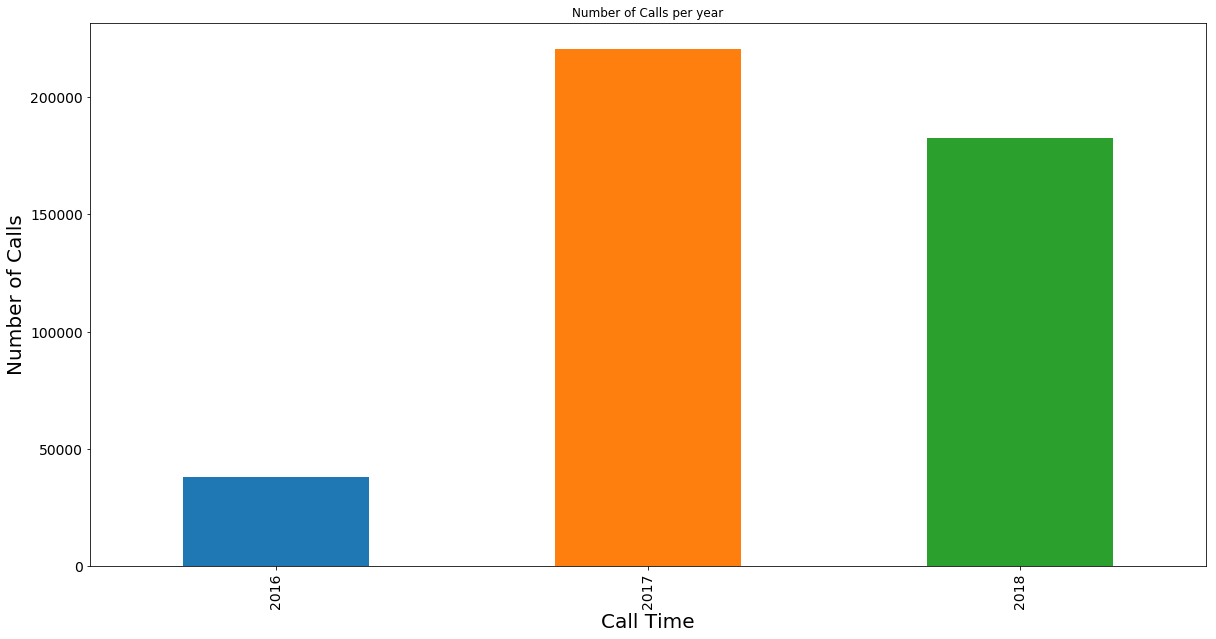

In [110]:
plt.figure(figsize=(20,10))
plt.ylabel('Number of Calls', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.title('Number of Calls per year')
df_new.groupby([df_new.index.year]).size().plot(kind='bar', style=["seaborn-whitegrid"])
plt.show()

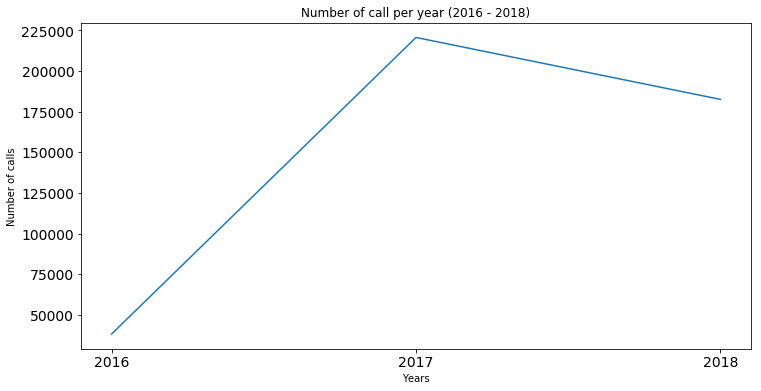

In [101]:
plt.figure(figsize=(12, 6))
df_new.resample('Y').size().plot(legend=False)
plt.title('Number of call per year (2016 - 2018)')
plt.xlabel('Years')
plt.ylabel('Number of calls')
plt.show()

# Average number of calls per month

In [98]:
df_new['Call Time'] = pd.to_datetime(df_new['Call Time'], format = '%m/%d/%Y %I:%M:%S %p')
df_new.index = pd.DatetimeIndex(df_new['Call Time'])

C:\Users\Anirudh MVR\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


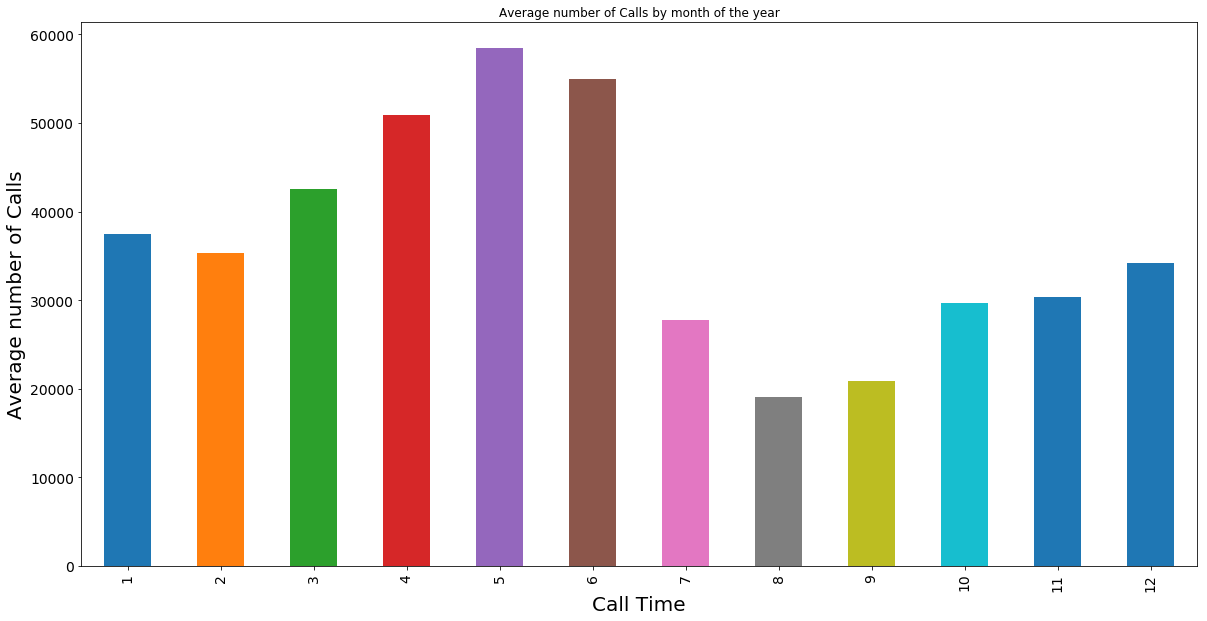

In [115]:
plt.figure(figsize=(20,10))
plt.ylabel('Average number of Calls', fontsize=20)
plt.xlabel('Month of the year', fontsize=20)
#plt.rcParams['ytick.labelsize'] = 14
#plt.rcParams['xtick.labelsize'] = 14
plt.title('Average number of Calls by month of the year')
df_new.groupby([df_new.index.month]).size().plot(kind='bar', style=["seaborn-whitegrid"])
plt.show()

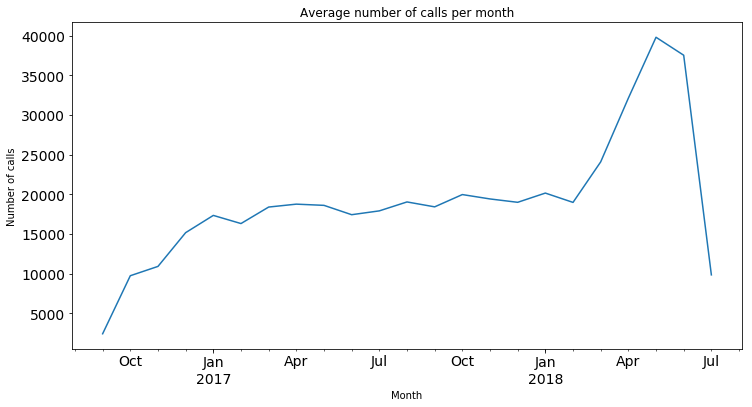

In [111]:
plt.figure(figsize=(12, 6))
df_new.resample('M').size().plot(legend=False)
plt.title('Average number of calls per month')
plt.xlabel('Month')
plt.ylabel('Number of calls')
plt.show()

# Average number of calls per day

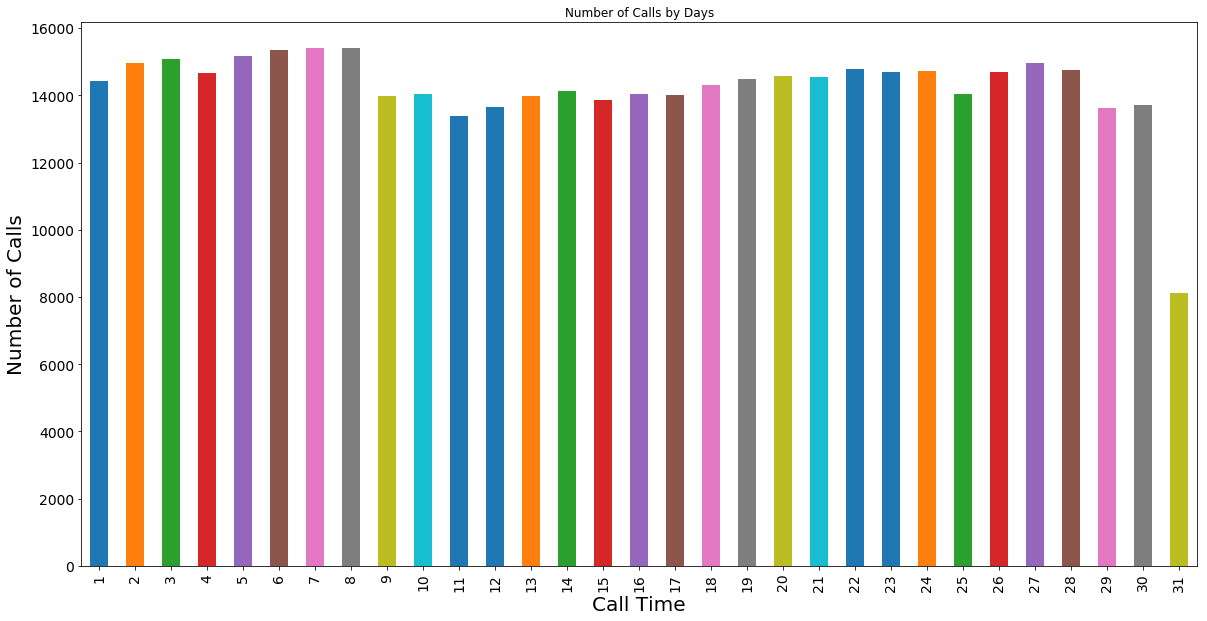

In [106]:
plt.figure(figsize=(20,10))
plt.ylabel('Number of Calls', fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.title('Number of Calls by Days')
df_new.groupby([df_new.index.day]).size().plot(kind='bar', style=["seaborn-whitegrid"])
plt.show()

# Correlation

C:\Users\Anirudh MVR\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


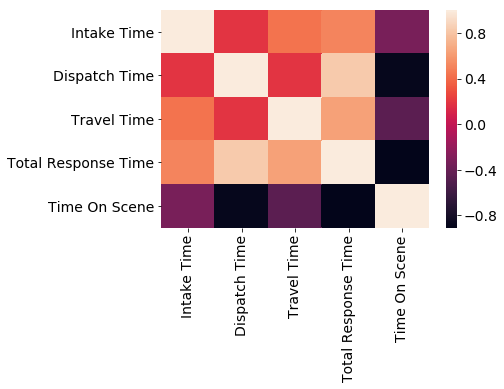

In [114]:
from sklearn.preprocessing import Normalizer
df_sub = dff[['Intake Time','Dispatch Time', 'Travel Time', 'Total Response Time', 'Time On Scene']]
df_sub.dropna(inplace=True)
df_nor = Normalizer().fit_transform(df_sub)
corr = pd.DataFrame(df_nor).corr()

sns.heatmap(corr, 
           xticklabels=df_sub.columns.values,
           yticklabels=df_sub.columns.values)

# Google Map Plotting

In [56]:
from gmplot import gmplot

In [57]:
lat = df_new['Latitude']
long = df_new['Longitude']

In [58]:
gmap = gmplot.GoogleMapPlotter(42.3314, -83.0458, 8)
gmap.heatmap(lat, long)

In [59]:
gmap.draw('my_map.html')

# Summary

The name of the dataset is “DPD: 911 Calls for Service”, which has been fetched from the following URL: https://data.detroitmi.gov/Public-Safety/DPD-911-Calls-for-Service-September-20-2016-Presen/wgv9-drfc

This raw dataset had 1.17 million rows and 25 columns initially. After the data cleaning, the dataset has 441576 rows and 25 columns. This data represents all the 911 police emergency calls for service response and officer-initiated call for service in the City of Detroit from the beginning September 20, 2016 - present.

People call 911 to request police services during emergency. Calls for which officer was initiated include traffic stops, street investigations and other policing activities like observing crimes in progress where the police officers were initiated. This data includes the responding agency, unit, call type and category of each call. The table includes all the calls taken, dispatch time, travel time and total response time for all the calls serviced by a police agency.

The first visualization shows the top ten neighborhood from where the highest number of calls were made. In this list of top ten, the highest number of calls were made from “Midtown” and the least number of calls were made from “Warren Ave Community”.

The second visualization shows the top ten reasons for people calling the 911 service. In this list of top ten, the highest number of calls were made for “Traffic Stop” and the least number of calls were made for “Remarks”.

The third visualization shows the number times, officers being initiated and not being initiated. Officers were initiated for 301088 calls and officers  were not initiated for 140488 calls.

The fourth visualization shows the number of calls per year.

The fifth visualization shows the average number of calls per month.

The sixth visualization shows the average number calls on a daily basis.

The seventh visualization shows the correlation. 